<h1> Inference of gene regulatory netowrks that are related to a specific signal (circadian rhythm)</h1>
<h3>Applying GRNBoost2 algorithm over our enhanced data, for uncovering gene regulatory network that are related to the circadian rhythm.</h3>


In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
from algorithms import *
from data_gen import *
from spectrum_gen import *
from visualizations import *
from analysis import *



In [2]:
from arboreto.utils import load_tf_names
from arboreto.algo import grnboost2


Functions

In [3]:
def calculate_single_cr_network(network_raw,network_en):
    '''Calculate the score (by GRNBoost2) of a known regulatory network (circadian rhythm network)'''
    relation_list =[
    ]
    Per2 = ['Per1','Per2','Per3']
    Cry1 = ['Cry1','Cry2']
    nr_group= ['Nr1d1','Nr1d2','Rora','Rorb','Rorc']
    Bmal = ['Arntl','Npas2']
    Dbp_group= ['Dbp'',Hlf','Tef','E4bp4']
    for item in nr_group:
        for item2 in Per2:
            relation_list.append((item2,item))
        for item2 in Cry1:
            relation_list.append((item2,item))
            relation_list.append((item,item2))
        for item2 in Dbp_group:
                relation_list.append((item2,item))
        for item2 in Bmal:
                relation_list.append((item,item2))
                relation_list.append((item2,item))
    for item in Dbp_group:
        for item2 in Per2:
            relation_list.append((item2,item))
            relation_list.append((item,item2))
        for item2 in Cry1:
            relation_list.append((item2,item))
            relation_list.append((item,item2))
        for item2 in Bmal:
                relation_list.append((item2,item))
    for item in Bmal:
        for item2 in Per2:
            relation_list.append((item,item2))
        for item2 in Cry1:
            relation_list.append((item,item2))
    for item in Per2:
        for item2 in Cry1:
            relation_list.append((item2,item))
            relation_list.append((item,item2))
    raw_sum=0
    en_sum =0
    for item in relation_list:
        if item[0] in network_en['TF'].values:
                tmp_row = network_en.loc[((network_en['TF'] == item[0])) ]
                if item[1] in tmp_row['target'].values:
                    tmp_row = tmp_row.loc[((tmp_row['target'] == item[1])) ]
                    en_sum+=float(tmp_row['importance'])
    for item in relation_list:
        if item[0] in network_raw['TF'].values:
                tmp_row = network_raw.loc[((network_raw['TF'] == item[0])) ]
                if item[1] in tmp_row['target'].values:
                    tmp_row = tmp_row.loc[((tmp_row['target'] == item[1])) ]
                    raw_sum+=float(tmp_row['importance'])
    print(raw_sum)
    print(en_sum)
    return raw_sum , en_sum



Calculate the gene regulatory network for each cell type using GRNBoost2

In [4]:
cluster_list = ['SCN Neurons',
    'Ependymal',
    'Oligodendrocytes',
    'Endothelial',
    'Microglia',          
    'NG2',
    'Astrocytes',
    'Tanycytes',
    ]


77.28020522105403
67.85928058207323
9.716002580507876
25.55003400433723
2.241111073119786
18.84239477995103
0.575344056676033
9.377865332293373
1.3217464829721903
4.28794429971199
2.3025926187018584
2.9850110064771154
0.8655647328224998
2.663680783970358
0.2540699031300583
1.0728018729319915


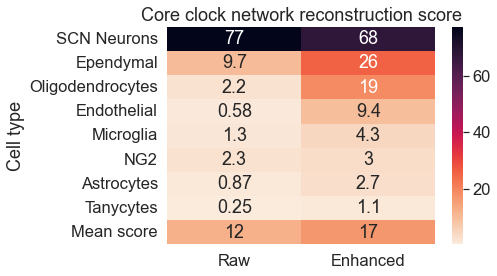

In [5]:
res = np.zeros((len(cluster_list)+1,2))
for i, cluster in enumerate(cluster_list):
    network_en = pd.read_csv("SCN/"+ cluster + "_netowrk_en_tf.csv")  
    network_raw = pd.read_csv('SCN/' + cluster + '_netowrk_raw_tf.csv')  
    res_raw , res_en = calculate_single_cr_network(network_raw, network_en)
    res[i,0]=res_raw
    res[i,1]=res_en
res[len(cluster_list),0]=np.mean(res[:len(cluster_list),0])
res[len(cluster_list),1]=np.mean(res[:len(cluster_list),1])
    
df = pd.DataFrame(res, index=(cluster_list+['Mean score']), columns=['Raw','Enhanced'])
sns.color_palette("tab10")
sns.set(font_scale=1.5) # font size 2

plt.show()
ax = sns.heatmap(df,annot=True , cmap='rocket_r').set(title= "Core clock network reconstruction score", ylabel='Cell type')
plt.show()
